### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

In [46]:
sns.set_style('whitegrid')

In [43]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [47]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

In [49]:
pct_to_target[0:10]

array([1.06, 1.12, 1.05, 1.2 , 1.09, 0.83, 1.02, 0.84, 0.98, 1.07])

In [61]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [62]:
sales_target[0:10]

array([100000, 100000,  75000,  75000,  75000,  75000,  75000, 300000,
        75000, 100000])

In [63]:
# Show how to create the dataframe
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})
df.head()

,Pct_To_Target,Sales_Target
0,1.06,100000
1,1.12,100000
2,1.05,75000
3,1.20,75000
4,1.09,75000


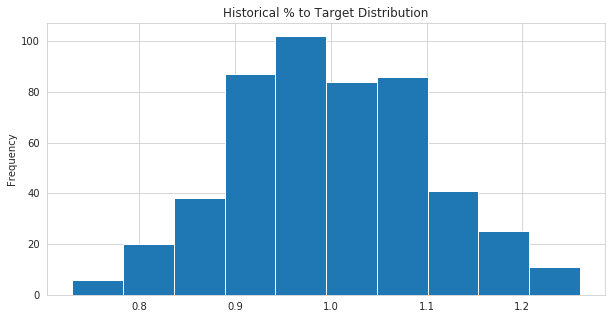

In [36]:
# Simple histogram to confirm distribution looks as expected
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution', figsize=(10,5))

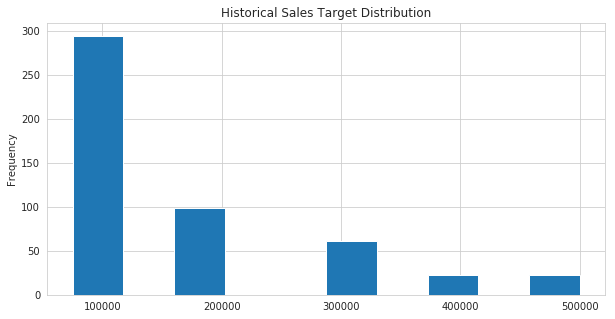

In [13]:
# Look at the sales target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution', figsize=(10,5))

In [14]:
# Back into the actual sales amount
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [15]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [16]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)

In [18]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate
0,0.88,75000,66000.0,0.02
1,0.93,400000,372000.0,0.03
2,0.78,75000,58500.0,0.02
3,1.10,100000,110000.0,0.04
4,0.93,75000,69750.0,0.03


In [19]:
# Calculate the commissions
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [20]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,0.88,75000,66000.0,0.02,1320.0
1,0.93,400000,372000.0,0.03,11160.0
2,0.78,75000,58500.0,0.02,1170.0
3,1.10,100000,110000.0,0.04,4400.0
4,0.93,75000,69750.0,0.03,2092.5


In [21]:
print(df['Sales'].sum(), df['Commission_Amount'].sum(), df['Sales_Target'].sum())

84341250.0 2854360.0 84550000


In [22]:
df.describe()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
count,500.000000,500.000000,500.000000,500.000000,500.00000
mean,0.998640,169100.000000,168682.500000,0.033240,5708.72000
std,0.101129,117453.312261,119011.471209,0.007643,4487.54794
min,0.640000,75000.000000,52500.000000,0.020000,1050.00000
25%,0.930000,75000.000000,81750.000000,0.030000,2910.00000
50%,1.000000,100000.000000,105500.000000,0.040000,4060.00000
75%,1.060000,200000.000000,212000.000000,0.040000,8240.00000
max,1.280000,500000.000000,605000.000000,0.040000,24200.00000


### Show Full Example of the simulation

In [23]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):
    
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    
    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    
    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    
    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0), 
                      df['Commission_Amount'].sum().round(0), 
                      df['Sales_Target'].sum().round(0)])

In [24]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales', 'Commission_Amount', 'Sales_Target'])

In [25]:
results_df.describe().round(0).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,759,508.0","2,860,581.0","83,753,200.0"
std,"2,661,926.0","99,983.0","2,629,784.0"
min,"76,565,250.0","2,555,535.0","76,400,000.0"
25%,"81,935,188.0","2,792,145.0","82,000,000.0"
50%,"83,678,500.0","2,857,560.0","83,625,000.0"
75%,"85,455,062.0","2,924,629.0","85,481,250.0"
max,"95,394,500.0","3,257,808.0","94,750,000.0"


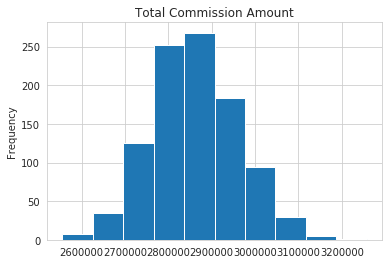

In [26]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

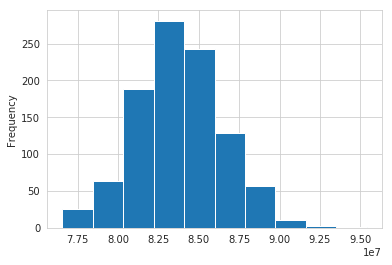

In [27]:
results_df['Sales'].plot(kind='hist')